/var/folders/gj/bwfyx1ks0p17lbgn6fl1nx1c0000gp/T/ipykernel_66069/699161811.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['dl_tm'] = pd.to_datetime(filtered_df['dl_tm'])
/var/folders/gj/bwfyx1ks0p17lbgn6fl1nx1c0000gp/T/ipykernel_66069/699161811.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['date'] = filtered_df['dl_tm'].dt.date
/var/folders/gj/bwfyx1ks0p17lbgn6fl1nx1c0000gp/T/ipykernel_66069/699161811.py:37: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missi

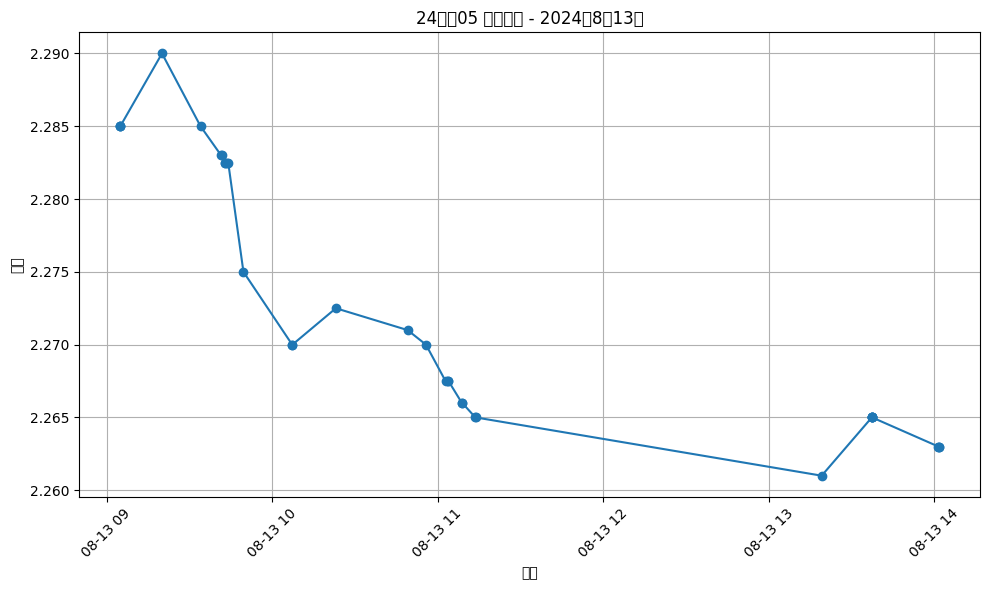

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
data = pd.read_csv("broker_data2024-09-18.csv")

# 过滤出'24国开05'的记录
filtered_df = df[df['bond_shrt_nm'] == '24国开05']

# 将'dl_tm'列转换为datetime格式
filtered_df['dl_tm'] = pd.to_datetime(filtered_df['dl_tm'])

# 提取日期部分，并过滤出2024年8月13日的数据
filtered_df['date'] = filtered_df['dl_tm'].dt.date
filtered_df_0813 = filtered_df[filtered_df['date'] == pd.to_datetime('2024-08-13').date()]

# 计算价格的平均值和标准差
mean_price = filtered_df_0813['dlt_prc'].mean()
std_price = filtered_df_0813['dlt_prc'].std()

# 定义3σ的范围，剔除异常值
lower_bound = mean_price - 3 * std_price
upper_bound = mean_price + 3 * std_price
filtered_df_0813 = filtered_df_0813[(filtered_df_0813['dlt_prc'] >= lower_bound) & (filtered_df_0813['dlt_prc'] <= upper_bound)]

# 按时间'dl_tm'列进行升序排序
filtered_df_0813 = filtered_df_0813.sort_values(by='dl_tm')

# 绘制2024年8月13日的价格随时间变化图
plt.figure(figsize=(10, 6))
plt.plot(filtered_df_0813['dl_tm'], filtered_df_0813['dlt_prc'], marker='o', linestyle='-')
plt.title('24国开05 行情变化 - 2024年8月13日')
plt.xlabel('时间')
plt.ylabel('价格')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件并筛选特定债券数据
data = pd.read_csv('transaction_data2024-09-18.csv')
filtered_data = data[data['bond_cd'] == 230210]

# 转换时间戳格式
filtered_data['timeStamp'] = pd.to_datetime(filtered_data['dl_tm'])

# 排序
sorted_data = filtered_data.sort_values(by='timeStamp', ascending=True)

# 计算均值和标准差
mean_net_prc = sorted_data['net_prc'].mean()
std_net_prc = sorted_data['net_prc'].std()

# 计算上下限
lower_limit = mean_net_prc - 3 * std_net_prc
upper_limit = mean_net_prc + 3 * std_net_prc

# 筛选出偏离平均值3倍标准差的异常行
outliers = sorted_data[(sorted_data['net_prc'] < lower_limit) | (sorted_data['net_prc'] > upper_limit)]

# 创建绘图
plt.figure(figsize=(14, 6))
plt.plot(sorted_data['timeStamp'], sorted_data['net_prc'], marker='o', markersize=3, label='Net Price')
plt.scatter(outliers['timeStamp'], outliers['net_prc'], color='red', label='Outliers')  # 添加异常值的红色点
plt.xlabel('Time')
plt.ylabel('Net Price')
plt.title('Net Price of Bond 230004 Over Time | Transaction sheet')
plt.xticks(rotation=30)
plt.grid(True)

# 调整 y 轴范围
plt.ylim(min(sorted_data['net_prc']) - 0.5, max(sorted_data['net_prc']) + 1)

# 添加图例
plt.legend()

plt.show()


KeyError: 'dl_tm'

In [12]:
data

,dl_cd,trdng_md_cd,trdng_mthd_cd,bond_cd,bnds_nm,net_prc,yld_to_mrty,nmnl_vol,amnt,byr_instn_cn_full_nm,slr_instn_cn_full_nm
0,CBT20240918312472,NDM,Negotiate,212480053,24合肥科技农商行债02,100.0000,2.2699,90000000.0,90000000.0,中国国际金融股份有限公司,宁波银行股份有限公司
1,CBT20240918312258,NDM,Negotiate,232480033,24建行二级资本债02A,100.3124,2.1738,80000000.0,80249920.0,山西证券股份有限公司,中国银行股份有限公司
2,CBT20240918312494,NDM,Negotiate,212480053,24合肥科技农商行债02,100.0000,2.2699,10000000.0,10000000.0,中国国际金融股份有限公司,宁波银行股份有限公司
3,CBT20240918311784,NDM,Negotiate,190205,19国开05,106.5483,1.8800,80000000.0,85238640.0,中国银行股份有限公司,华创证券有限责任公司
4,CBT20240918310507,NDM,Negotiate,230205,23国开05,106.7783,2.1350,50000000.0,53389150.0,恒丰银行股份有限公司,平安银行股份有限公司
...,...,...,...,...,...,...,...,...,...,...,...
13136,CBT20240918300029,NDM,Negotiate,2400004,24特别国债04,106.1668,2.1875,20000000.0,21233360.0,宁波通商银行股份有限公司,平安银行股份有限公司
13137,CBT20240918300067,NDM,Negotiate,240203,24国开03,101.8916,1.8500,100000000.0,101891600.0,平安证券股份有限公司,浦银安盛基金管理有限公司
13138,CBT20240918300038,NDM,Negotiate,240203,24国开03,101.9130,1.8450,50000000.0,50956500.0,渣打银行(中国)有限公司,平安银行股份有限公司
13139,CBT20240918300009,NDM,Negotiate,240210,24国开10,101.6955,2.1525,30000000.0,30508650.0,宁波通商银行股份有限公司,平安证券股份有限公司
